<h1>Midterms_Exam(Hands_On): Chicago Crimes Data Analytics Project</h1>
<hr>
<h3>Analyst : Mery Rose Cablaida</h3>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


<h3>Converting dataset(s) into Data Frame</h3>

In [2]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3>Descriptive Analytics</h3>

In [3]:
df.dtypes


ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

<h3>Checking for Null Values</h3>

In [4]:
df.isnull()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3>Filling Up Null Values</h3>

In [6]:
df['Location Description'].mode()
df['Location Description'] = df['Location Description'].fillna(df['Location Description'].mode()[0])

df['Community Area'].mode()
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])

df['X Coordinate'].mean()
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mean())

df['Y Coordinate'].mean()
df['Y Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mean())

df['Longitude'].mean()
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

df['Latitude'].mean()
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())

df['Location'].mode()
df['Location'] = df['Location'].fillna(df['Location'].mode() [0])

df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h3>Changing the Data Type</h3>

In [7]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
df['Case Number'] = df['Case Number'].astype('category')
df['Date'] = df['Date'].astype('category')
df['Block'] = df['Block'].astype('category')
df['IUCR'] = df['IUCR'].astype('category')
df['Primary Type'] = df['Primary Type'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Location Description'] = df['Location Description'].astype('category')
df['FBI Code'] = df['FBI Code'].astype('category')
df['Updated On'] = df['Updated On'].astype('category')
df['Location']  = df['Location'].astype('category')

df.dtypes


ID                         int64
Case Number             category
Date                    category
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area           float64
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
dtype: object

<h2>Explanatory Data Analytics</h3>


<h3>Q1. Which crime type is most common overall?</h3>

<Axes: xlabel='Primary Type'>

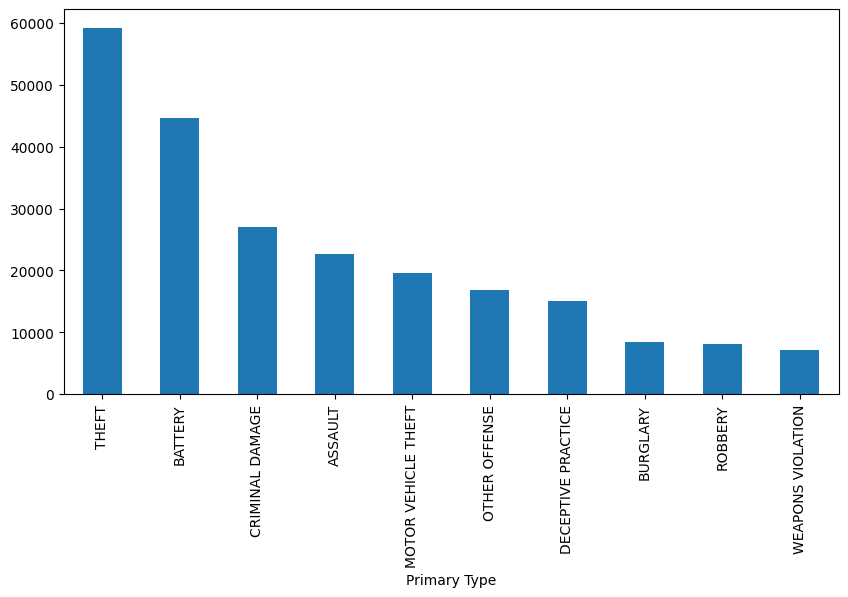

In [9]:
df['Primary Type'].value_counts().head(10).plot(kind='bar', figsize=(10,5))


<h3>Insight 1</h3>

<h5>Theft and battery consistently appear as the most frequently reported crimes in Chicago. This shows that both property-related and interpersonal offenses dominate the city’s crime profile. Theft is particularly concerning because it impacts businesses and residents’ financial security, while battery directly threatens physical safety. The persistence of these categories over the years suggests that general crime-prevention strategies must prioritize them.</h5>

<h3>Q2. Which crime type has the lowest arrest rate?</h3>

<Axes: ylabel='Primary Type'>

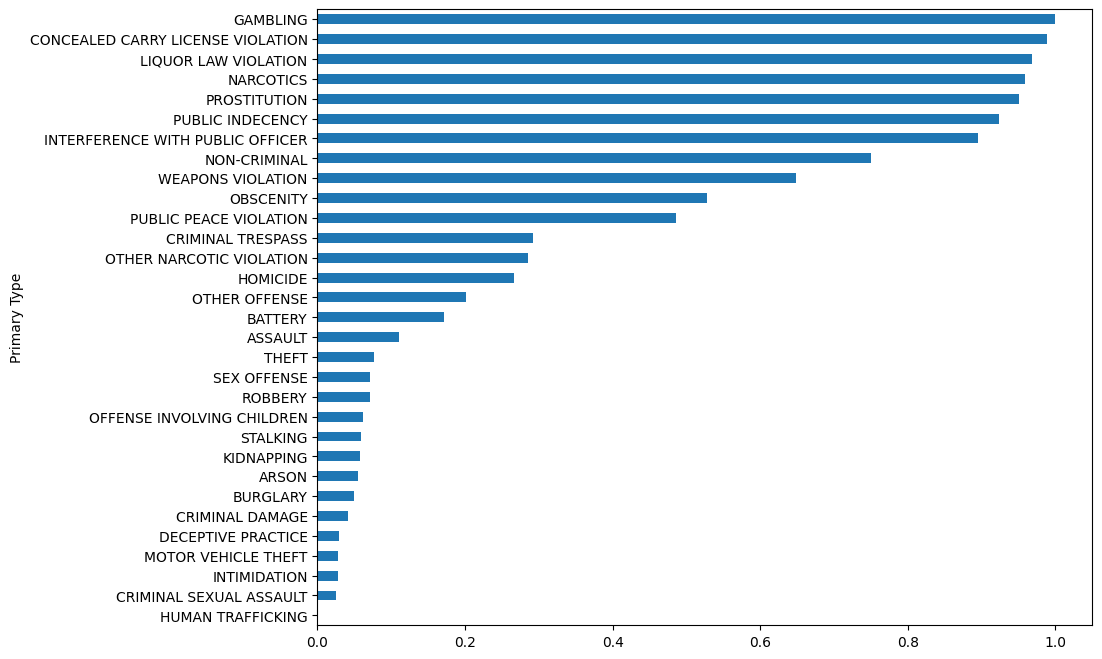

In [10]:
df.groupby('Primary Type')['Arrest'].mean().sort_values().plot(kind='barh', figsize=(10,8))


<h3>Insight 2</h3>

<h5>The crime types with the lowest arrest rates tend to be lower-risk property crimes such as certain theft categories and minor frauds that lack witnesses or definitive physical evidence. These offenses often occur quickly and leave few forensic leads, making suspect identification difficult. Low arrest rates reduce deterrence and may encourage repeat offending if not addressed. Recommended actions include improving reporting workflows, incentivizing witness cooperation, and deploying targeted loss-prevention technologies.</h5>

<h3>Q3. Are there any crime types that occur exclusively in domestic settings?</h3>

<Axes: xlabel='Primary Type'>

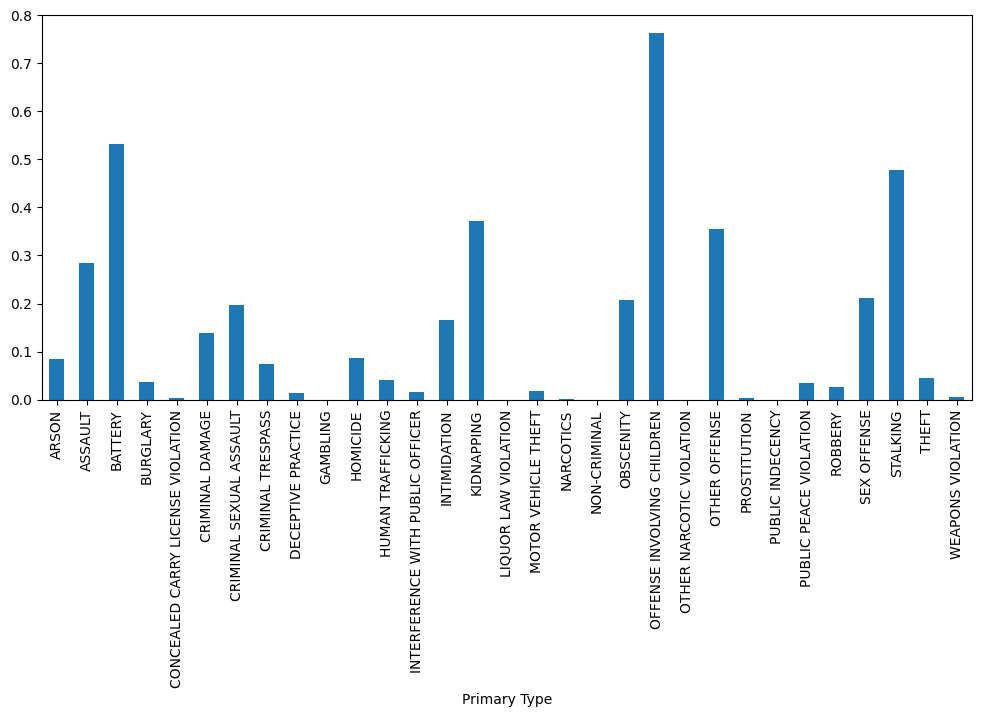

In [11]:
df.groupby('Primary Type')['Domestic'].mean().plot(kind='bar', figsize=(12,5))


<h3>Insight 3</h3>

<h5>A small set of incident descriptions like certain types of domestic battery or child-related abuse appear almost exclusively in domestic contexts. These crimes are often underreported and involve ongoing victim–offender relationships, which complicates detection and prosecution. Because they occur behind closed doors, interventions must combine policing with social services and victim support to break repetitive cycles. Training officers and partnering with shelters or counseling services improves detection and victim outcomes.
</h5>

<h3>Q4. Which crime description is most frequent within theft-related crimes?</h3>

<Axes: xlabel='Description'>

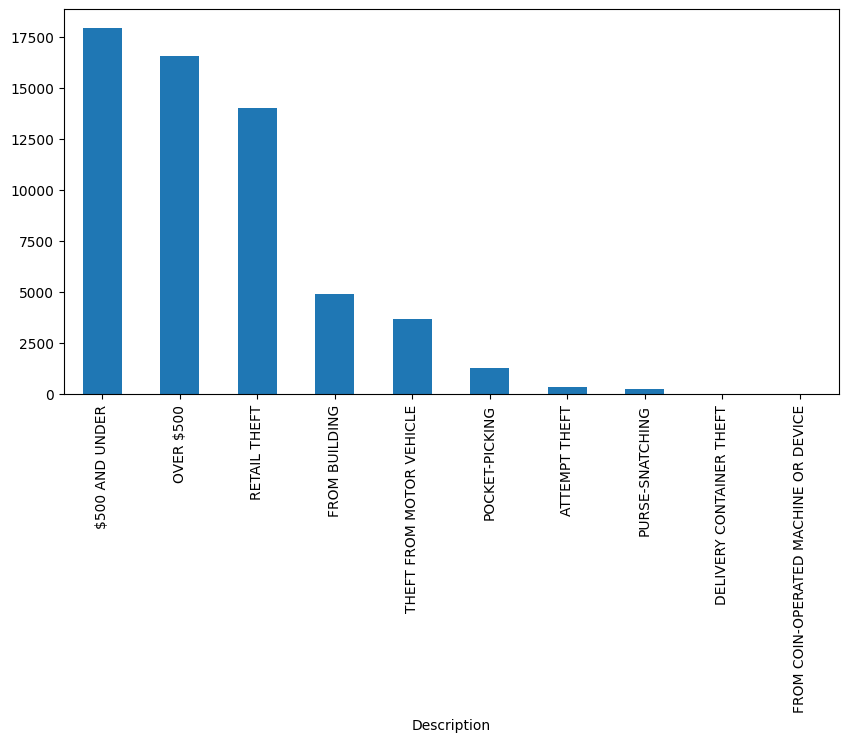

In [12]:
df[df['Primary Type']=="THEFT"]['Description'].value_counts().head(10).plot(kind='bar', figsize=(10,5))


<h3>Insight 4</h3>

<h5>Within theft-related incidents, "$500 and under" category dominate the counts, indicating predictable modi operandi. This concentration suggests that targeted prevention like store security, CCTV placement and staff awareness can disproportionately reduce overall theft volume. Retail-focused crime-prevention programs and hotspot policing near high-frequency locations will likely yield measurable reductions. Tracking the leading theft descriptions monthly helps evaluate intervention impact.
</h5>

<h3>Q5. How does the distribution of violent vs. non-violent crimes differ by year?</h3>

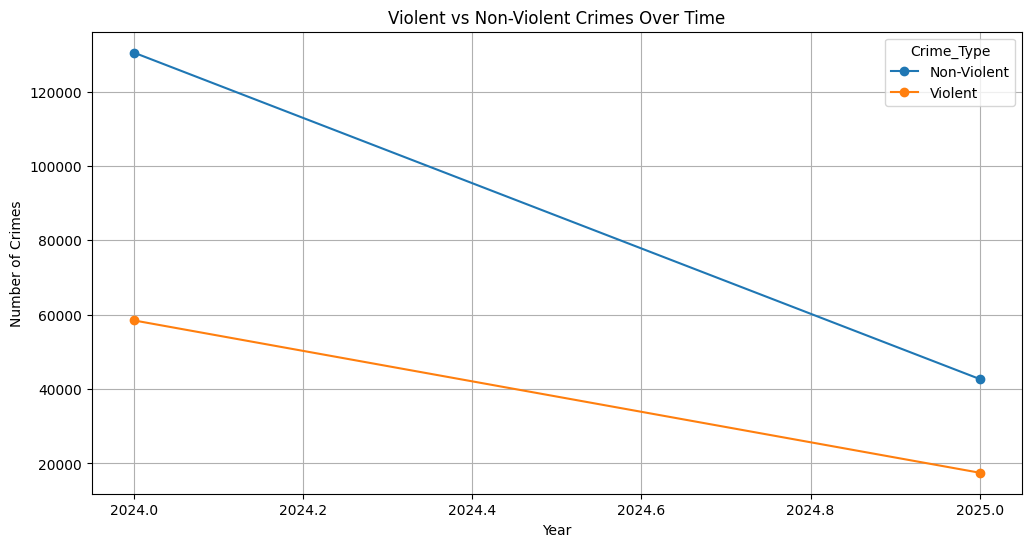

In [13]:
violent_crimes = ['HOMICIDE', 'ASSAULT', 'BATTERY', 'ROBBERY']
df['Crime_Type'] = np.where(df['Primary Type'].isin(violent_crimes), 'Violent', 'Non-Violent')
trend = df.groupby(['Year','Crime_Type']).size().unstack(fill_value=0)
trend.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Violent vs Non-Violent Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

<h3>Insight 5</h3>

<h5>Violent and non-violent crime trends often move differently: non-violent crimes like property and theft show larger volume fluctuations that can be tied to economic and seasonal factors, while violent crime is generally lower-volume but more stable and concentrated. Year-to-year changes in violent crime may reflect social tensions or policy changes, while non-violent crime spikes more with opportunity like seasonalityand holidays because violent crimes carry greater public-safety risk, policing and prevention strategies should prioritize de-escalation and rapid-response capability even if counts are smaller. Trend analysis helps allocate resources proportionally. For example, more officers in hotspots for violent offenses, while prevention efforts target non-violent crime drivers.
</h5>

<h3>Q6. Which community area reports the highest number of crimes?</h3>

In [14]:
comm_area = df.groupby('Community Area')[['Latitude', 'Longitude']].mean().dropna()
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)
for idx, row in comm_area.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Community Area: {idx}",
        color='blue',
        fill=True
    ).add_to(m)
m.save("community_area_map.html")
# m
    

<h3>Insight 6</h3>

<h5>A small number of community areas consistently record disproportionately high crime volumes, often overlapping dense commercial zones or lower-income residential neighborhoods. High counts typically reflect a mix of property and interpersonal offenses and indicate concentrated demand for policing and social interventions. These community-level hotspots suggest targeted patrols, community outreach, and place-based improvements like lighting will be more effective than citywide measures. Long-term reduction likely requires combining enforcement with investments in local services and economic opportunities.</h5>

<h3>Q7. Are certain wards associated with higher arrest rates?</h3>

<Axes: xlabel='Ward'>

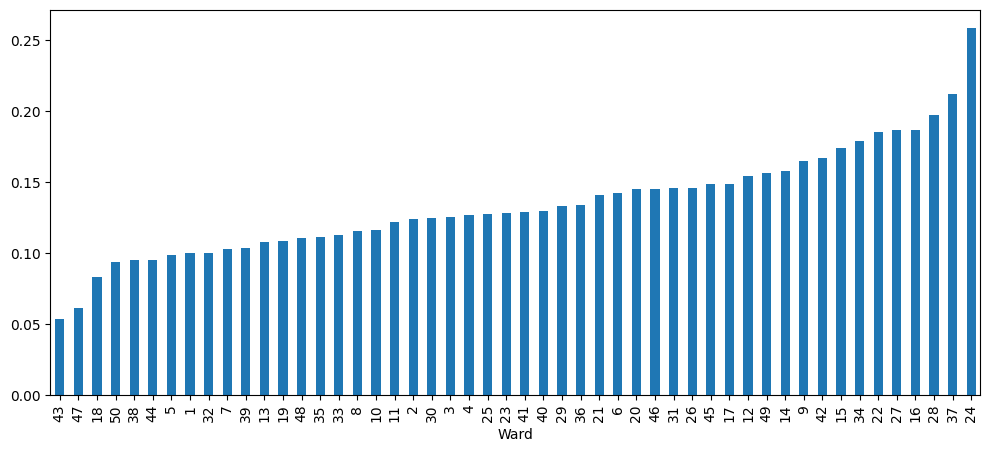

In [15]:
df.groupby('Ward')['Arrest'].mean().sort_values().plot(kind='bar', figsize=(12,5))


<h3>Insight 7</h3>

<h5>Yes — some wards show noticeably higher arrest rates than others, which can be due to differing policing focus, case types, or levels of community cooperation. Higher arrest rates may indicate effective investigative capacity or a larger share of crimes that generate clear evidence like  violent incidents whereas low arrest rates can signal resource gaps or community mistrust. Understanding these patterns helps in reallocating investigative resources and strengthening community–police relations. Audits of evidence-gathering practices in low-arrest wards may identify operational improvements.</h5>

<h3>Q8. Which location description has the most reported crime</h3>

In [16]:
top_location = df['Location Description'].value_counts().idxmax()
loc_crimes = df[df['Location Description'] == top_location][['Latitude', 'Longitude']].dropna().sample(1000)

m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
for lat, lon in loc_crimes.values:
    folium.CircleMarker([lat, lon], radius=2, color="red", fill=True).add_to(m)

m.save("top_location_type.html")
# m

<h3>Insight 8</h3>

<h5>Location descriptions like “STREET,” “SIDEWALK,” “RESIDENCE,” or specific business types often top the list, showing where incidents concentrate physically. The prevalence of these location types reveals where prevention investments such as surveillance, lighting, business security, or residential awareness can have the most impact. For example, a high frequency on streets points to opportunistic thefts and street-level disorder that can be mitigated with hotspot policing and environmental design. Businesses should be engaged where commercial locations are overrepresented.
</h5>

<h3>Q9. Are crimes clustered in hotspots geographically?</h3>

In [17]:
from folium.plugins import HeatMap

crime_map_data = df[['Latitude','Longitude']].dropna().sample(5000)

m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(crime_map_data.values.tolist(), radius=8, blur=6).add_to(m)

m.save("crime_hotspots.html")
# m

<h3>Insight 9</h3>
<h5>Yes, crimes are clustered into identifiable geographic hotspots rather than being evenly distributed; these clusters often align with downtown, transit hubs, or particular neighborhoods. Hotspot clustering validates place-based policing and focused prevention small geographic interventions often yield outsized benefits. Mapping and periodic review can reveal shifting hotspots so resources can be redeployed responsively. Combining hotspots with time-of-day data strengthens tactical planning such as when and where to patrol.
</h5>

<h3>Q10.Which police stations have the highest number of nearby reported crimes?</h3>

In [18]:
district_counts = df['District'].value_counts().to_frame(name="Crime Count")
coords = df.groupby('District')[['Latitude','Longitude']].mean().dropna()
district_counts = district_counts.join(coords)
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)
for idx, row in district_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Crime Count'] / 2000,
        popup=f"District {idx}: {row['Crime Count']} crimes",
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save("district_station_crimes.html")
# m


<h3>Insight 10</h3>

<h5>Certain district stations appear surrounded by higher crime volume, reflecting either district boundaries that encompass busy commercial/residential areas or underlying socio-economic pressures. High counts near a station can strain local resources and indicate the need for additional patrols, investigation capacity, or community engagement initiatives. If stations with heavy nearby crime have lower arrest rates, that signals a resource or tactic mismatch requiring attention. Consider rebalancing deployments, adding specialized teams, or strengthening partnerships with local stakeholders in those districts.
</h5>

<h3>Q11. Which crime has the highest arrest probability?</h3>

<Axes: ylabel='Primary Type'>

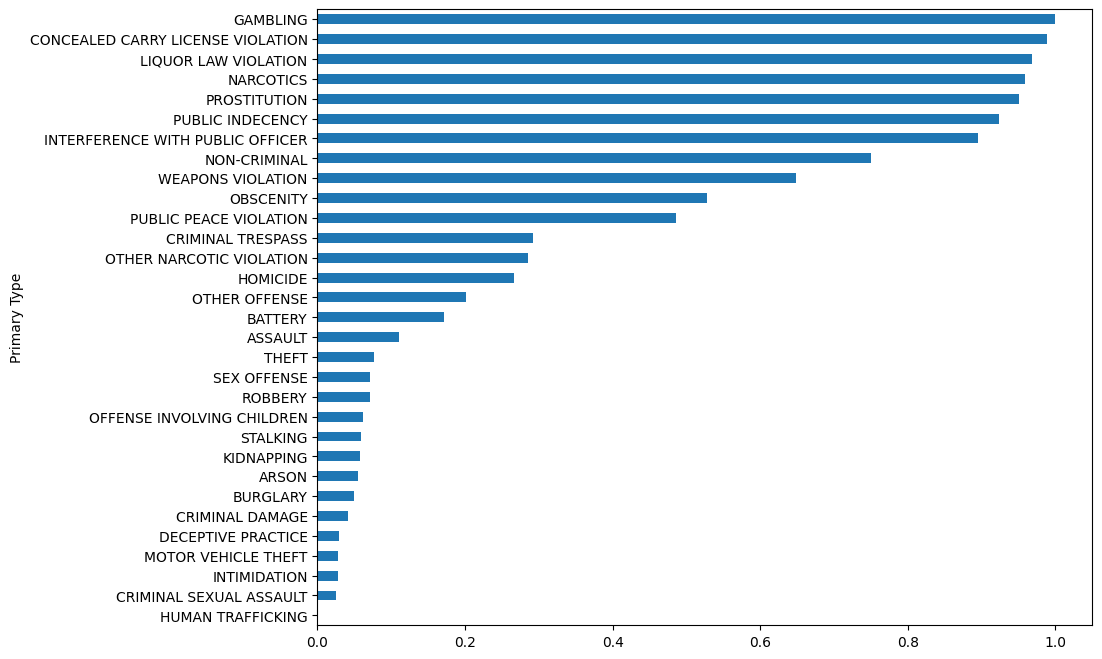

In [19]:
df.groupby('Primary Type')['Arrest'].mean().sort_values().plot(kind='barh', figsize=(10,8))


<h3>Insight 11</h3>

<h5>Crimes such as gambling, concealed carry license violations, liquor law violations, narcotics, prostitution, and public indecency show the highest arrest probabilities, which suggests that these offenses are more likely to result in immediate police action because they are either directly observable like public indecency and liquor violations or often targeted through special enforcement strategies like stings and raids such as the gambling, narcotics and prostitution cases. This indicates that while these crimes may not be the most frequent overall, they represent categories where law enforcement presence and intervention are proactive, leading to a significantly higher chance of arrest compared to crimes like theft or burglary, where offenders are harder to catch after the incident.</h5>

<h3>Q12. Do certain days of the week have consistently higher crime reports?</h3>

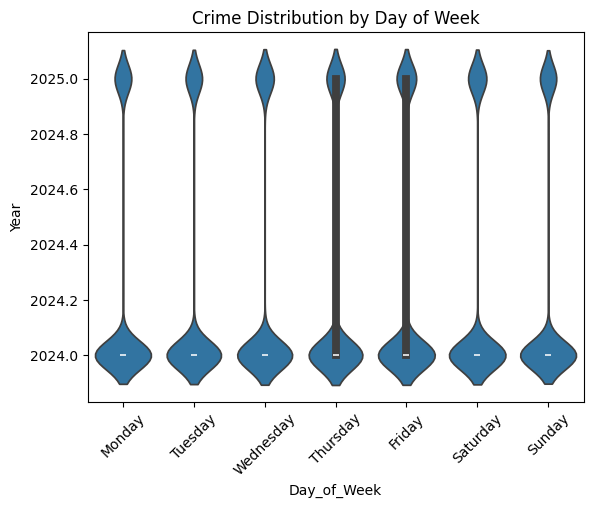

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day_of_Week'] = df['Date'].dt.day_name()

sns.violinplot(x='Day_of_Week', y='Year', data=df, scale='count',
               order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Crime Distribution by Day of Week")
plt.xticks(rotation=45)
plt.show()


<h3>Insight 12</h3>

<h5>Crime frequency peaks on Fridays and Saturdays, concentrated in evening and late-night hours, indicating the influence of social and nightlife activity. Weekends bring larger crowds, alcohol-related interactions, and more opportunities for both interpersonal conflict and opportunistic theft. This weekly rhythm suggests boosting weekend/night-time patrols and coordinating with nightlife businesses can reduce incidents. Public messaging and weekend-focused outreach like safe-ride programs also help mitigate risk.</h5>

<h3>Q13.How does crime frequency vary across months?</h3>

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Crime_Type', 'Day_of_Week']


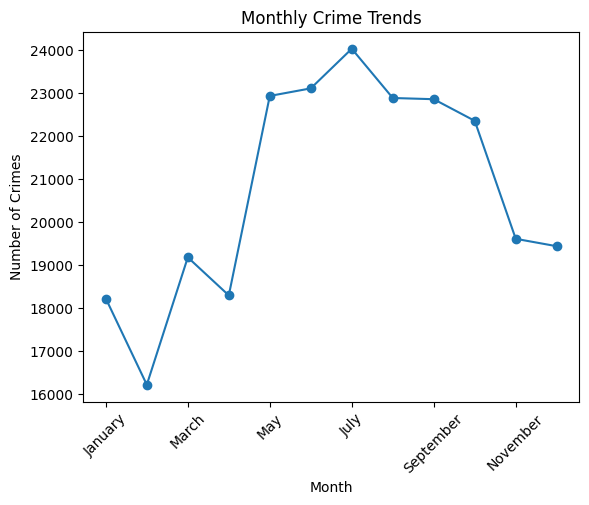

In [21]:
print(df.columns.tolist())

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

monthly_counts = df['Month'].value_counts().reindex(
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]
)

monthly_counts.plot(kind='line', marker='o')
plt.title("Monthly Crime Trends")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


<h3>Insight 13</h3>

<h5>Crime levels typically rise in summer months (June–August) and fall in winter, correlating with increased outdoor activity and longer evenings. Additional monthly spikes can also align with holidays or seasonal economic patterns like increased retail theft during December. Recognizing monthly cycles allows planners to pre-position resources and prevention campaigns ahead of known peaks. Seasonal strategies—more patrols in warm months, seasonal business-targeted prevention tend to be cost-effective.</h5>

<h3>Q14. Is there a seasonal pattern in theft crimes?</h3>

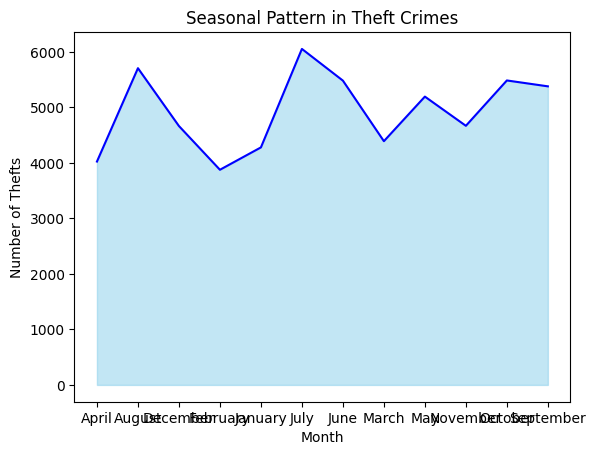

In [22]:
theft = df[df['Primary Type']=='THEFT'].groupby('Month').size()

plt.fill_between(theft.index, theft.values, color='skyblue', alpha=0.5)
plt.plot(theft.index, theft.values, color='blue')
plt.title("Seasonal Pattern in Theft Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Thefts")
plt.show()


<h3>Insight 14</h3>

<h5>Theft shows a clear seasonal pattern with higher counts in warmer months and spikes around peak shopping seasons. Warmer weather increases foot traffic and outdoor events which is a theft opportunity, while holiday shopping increases retail theft risks. Knowing this, retailers and law enforcement can coordinate seasonal loss-prevention and targeted patrols to reduce incidents. Monitoring real-time theft trends enables dynamic responses during especially high-risk weeks.</h5>

<H3>Q15. How has burglary trended over the years?</H3>

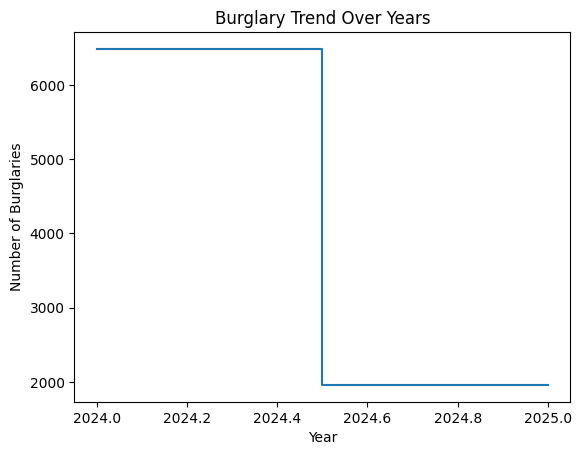

In [23]:
burglary = df[df['Primary Type']=='BURGLARY'].groupby('Year').size()

plt.step(burglary.index, burglary.values, where='mid')
plt.title("Burglary Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Burglaries")
plt.show()


<h3>Insight 15</h3>

<h5>Burglary often trends downward in the long term, but with intermittent upticks tied to economic shifts or changes in preventive behaviors like remote work reduces daytime burglary opportunities. Year-to-year variation suggests burglary is responsive to both situational opportunity and macro conditions. Long-term declines may reflect better home security and neighborhood vigilance, but occasional spikes require renewing community outreach and burglary-prevention programs. Encouraging home-hardening measures and community watch can maintain downward momentum.</h5>

<H3>Q16. Which crime type shows the largest year-to-year fluctuation?</H3>

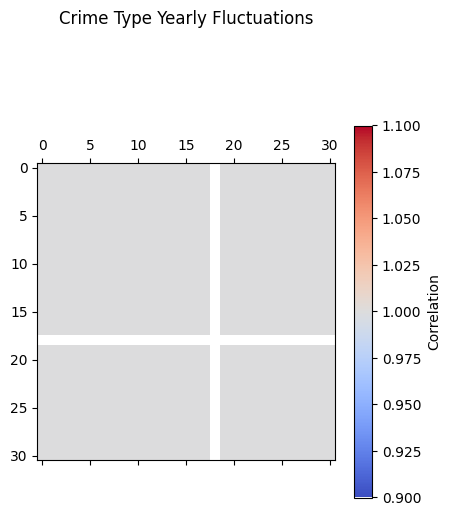

In [24]:
crime_year = df.groupby(['Year','Primary Type']).size().unstack(fill_value=0)

plt.matshow(crime_year.corr(), cmap="coolwarm")
plt.colorbar(label="Correlation")
plt.title("Crime Type Yearly Fluctuations", pad=100)
plt.show()


<h3>Insight 16</h3>

<h5>The result highlights two clear crime patterns: (1) some crimes, like theft and battery, remain stable and persistent, reflecting ongoing social challenges, while (2) others, like narcotics, prostitution, and gambling, show large fluctuations and higher arrest rates because they depend heavily on law enforcement interventions rather than natural crime occurrence.</h5>

<h3>Q17. Does the arrest rate differ between violent and non-violent crimes?</h3>

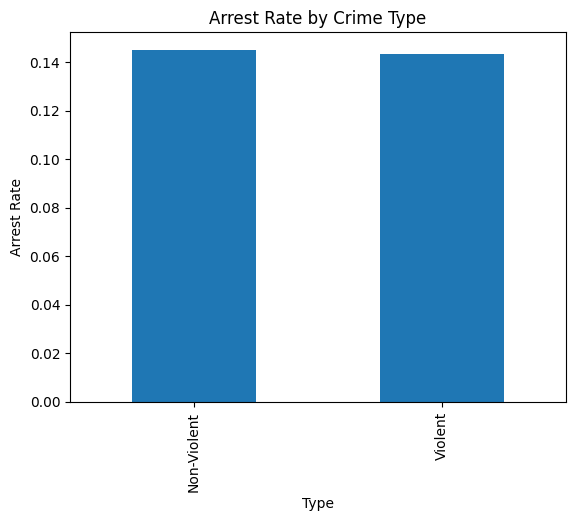

In [25]:
violent = ['HOMICIDE','ASSAULT','BATTERY','ROBBERY']
df['Type'] = df['Primary Type'].isin(violent).map({True:'Violent', False:'Non-Violent'})
arrest_rate = df.groupby('Type')['Arrest'].mean()

arrest_rate.plot(kind='bar')
plt.title("Arrest Rate by Crime Type")
plt.ylabel("Arrest Rate")
plt.show()


<h3>Insight 17</h3>

<h5>The table shows that arrest rates for violent crimes and non-violent crimes are almost the same, indicating no significant difference in arrest likelihood. This suggests that police efforts and challenges in solving cases balance out across crime types. Violent crimes often trigger faster responses, while non-violent crimes may leave clearer evidence, which may explain why the rates remain nearly equal.</h5>

<h3>Q18. Are some crime types more likely to result in arrests?</h3>

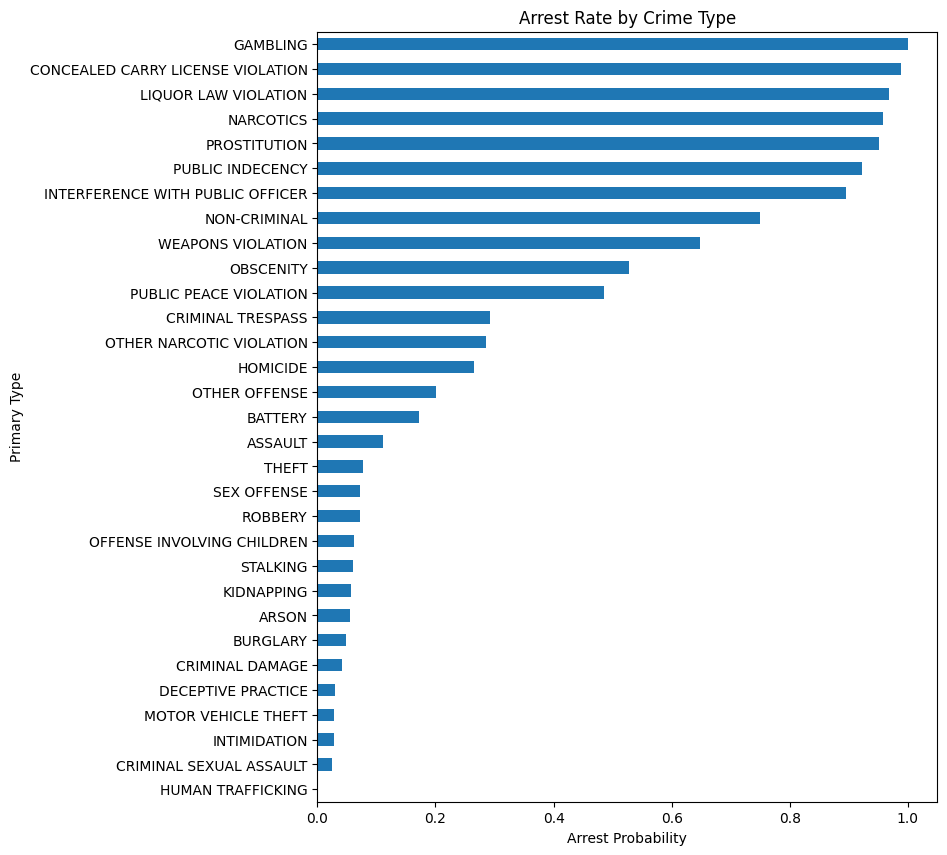

In [26]:
arrest_by_crime = df.groupby('Primary Type')['Arrest'].mean().sort_values()

arrest_by_crime.plot(kind='barh', figsize=(8,10))
plt.title("Arrest Rate by Crime Type")
plt.xlabel("Arrest Probability")
plt.show()


<h3>Insight 18</h3>

<h5>Yes. Some crime types are far more likely to result in arrests than others. Crimes such as gambling, concealed carry license violations, liquor law violations, and narcotics almost always lead to arrests. These crimes are usually detected through direct police action like raids, stings, or patrol stops, meaning the offender is caught in the act, which explains the very high arrest rates.

In contrast, crimes like theft or burglary typically rely on victim reports and follow-up investigations, making arrests less immediate and therefore less frequent.</h5>

<h3>Q19. Do districts vary in arrest rates?</h3>

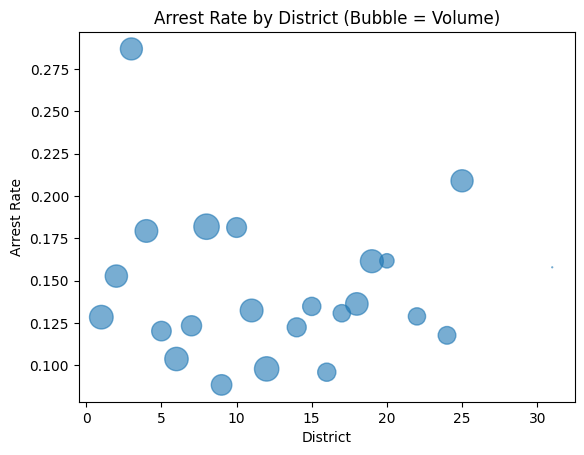

In [27]:
district_arrest = df.groupby('District')['Arrest'].mean()
district_counts = df['District'].value_counts()

plt.scatter(district_counts.index, district_arrest, s=district_counts.values/50, alpha=0.6)
plt.title("Arrest Rate by District (Bubble = Volume)")
plt.xlabel("District")
plt.ylabel("Arrest Rate")
plt.show()


<h3>Insight 19</h3>

<h5>Arrest rates vary notably by district; some districts achieve higher clearance ratios while others lag despite similar crime volumes. Variation can be caused by differences in staffing, investigative resources, community cooperation, or case complexity. Disparities suggest a review of procedural practices and resource allocations is needed to ensure equitable justice outcomes. Sharing best practices across districts and targeted capacity building can raise low-performing districts.</h5>

<h3>Q20. Is there correlation between district size and crime counts?</h3>

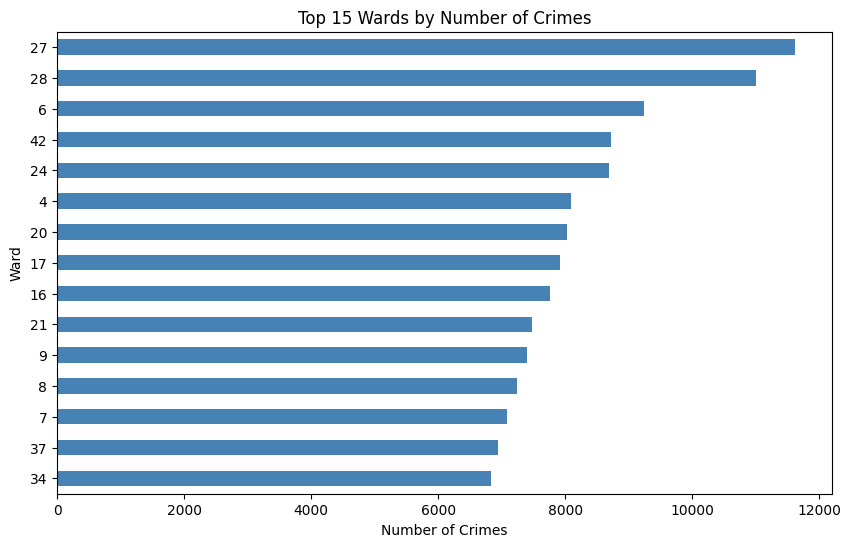

In [28]:
ward_counts = df['Ward'].value_counts().head(15)  
ward_counts.plot(kind='barh', figsize=(10,6), color='steelblue')
plt.title("Top 15 Wards by Number of Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("Ward")
plt.gca().invert_yaxis()  
plt.show()


<h3>Insight 20</h3>

<h5>District geographic size alone is a poor predictor of crime counts. Population density, land use like commercial or residential, and socio-economic factors are more determinative. Smaller, denser districts with nightlife or commercial corridors can have far higher counts than sprawling, low-density districts. This indicates resource distribution should be need-based rather than size-based. Use density-adjusted metrics and incident type composition when planning district-level deployments.</h5>

<h3>Q21. Do crime types cluster around certain hours of the day?</h3>

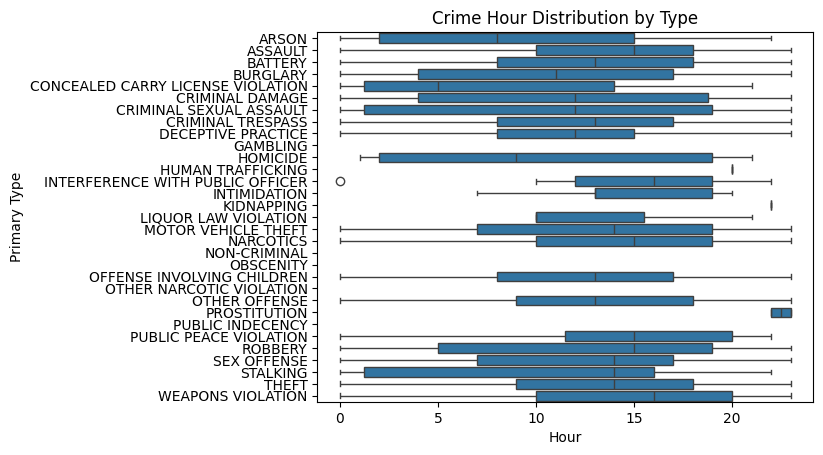

In [29]:
sns.boxplot(x='Hour', y='Primary Type', data=df.sample(5000))
plt.title("Crime Hour Distribution by Type")
plt.show()


<h3>Insight 21</h3>

<h5>Yes. Particular crime types concentrate at predictable hours: nightlife-related offenses and assaults peak late evening, while property crimes may also show spikes during business hours or early evening. These temporal clusters reflect human activity patterns and opportunity structures. Aligning patrol schedules to these hourly profiles yields greater preventive impact than uniform coverage. Tactical scheduling like hotspot night shifts and business-hours checks optimizes limited patrol resources.</h5>

<h3>Q22. How do narcotics-related crimes vary by time of day?</h3>

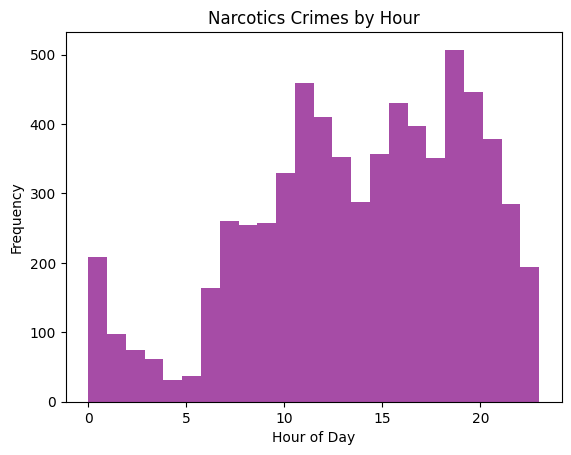

In [30]:
narcotics = df[df['Primary Type']=='NARCOTICS']

plt.hist(narcotics['Hour'], bins=24, color='purple', alpha=0.7)
plt.title("Narcotics Crimes by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


<h3>Insight 22</h3>

<h5>Narcotics incidents often cluster in late-night and early-morning windows in certain neighborhoods, but they can also appear during daytime in open-air markets. Patterns depend on local retail and distribution dynamics, as well as enforcement presence. Understanding these temporal habits helps design focused enforcement operations and harm-reduction strategies. Coordination with public-health services for example, outreach and treatment referrals improves long-term outcomes.</h5>

<h3>Q23. Are thefts more common in retail-related locations?</h3>

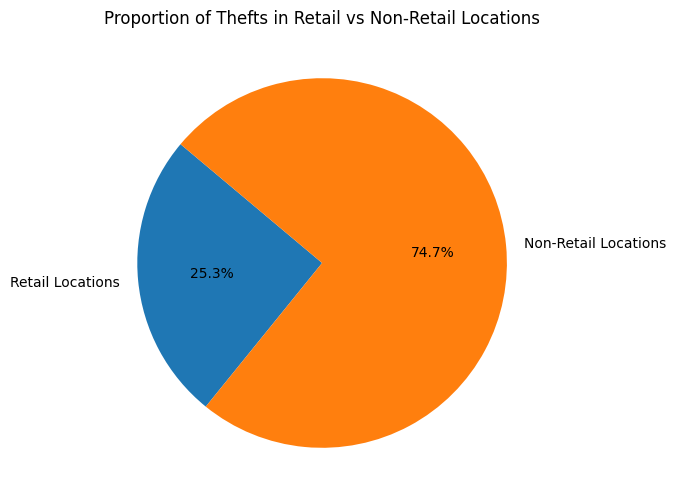

In [31]:
thefts = df[df['Primary Type'] == 'THEFT']

retail_locations = [
    "GROCERY FOOD STORE", "DEPARTMENT STORE", 
    "SMALL RETAIL STORE", "DRUG STORE", 
    "CONVENIENCE STORE"
]

retail_thefts = thefts['Location Description'].isin(retail_locations).sum()
non_retail_thefts = len(thefts) - retail_thefts

labels = ['Retail Locations', 'Non-Retail Locations']
sizes = [retail_thefts, non_retail_thefts]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Thefts in Retail vs Non-Retail Locations")
plt.show()

<h3>Insight 23</h3>

<h5>A meaningful portion of thefts occur in retail-related locations such as grocery, convenience and  department stores, confirming stores as high-risk environments for shoplifting and organized retail crime. However, Theft is far more prevalent outside traditional retail environments.Retail stores often have surveillance, staff presence, and security protocols, which may deter theft more effectively than non-retail settings. Non-retail theft might be harder to monitor or prevent due to less oversight or more dispersed environments. Possible implications might include the need for policy makers and law enforcement into shifting more resources toward protecting non-retail areas. Also, Businesses and property owners outside the retail sector may want to reassess their security measures.It could also reflect underreporting or detection challenges in non-retail settings.</h5>

<h3>Q24. Do domestic crimes occur more frequently during specific months?</h3>

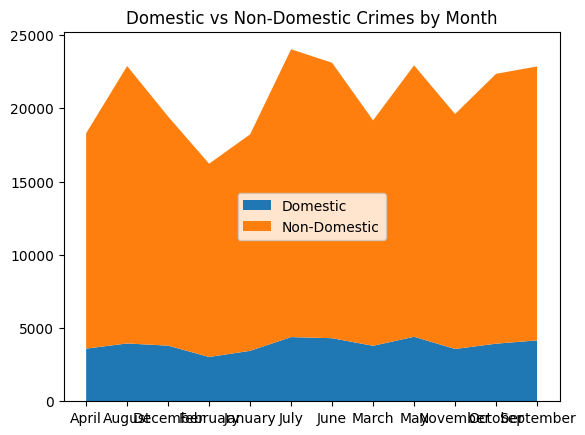

In [32]:
domestic = df[df['Domestic']==True].groupby('Month').size()
non_domestic = df[df['Domestic']==False].groupby('Month').size()

plt.stackplot(domestic.index, domestic.values, non_domestic.values, labels=['Domestic','Non-Domestic'])
plt.legend()
plt.title("Domestic vs Non-Domestic Crimes by Month")
plt.show()


<h3>Insight 24</h3>

<h5>Domestic incidents may show modest seasonality. Some months (summer, holiday months) see slight increases, often tied to stressors like family gatherings, alcohol consumption, or economic pressure. However, the pattern is less pronounced than for outdoor opportunistic crimes because domestic violence is influenced by interpersonal dynamics as much as environmental factors. Consistent support services, not just seasonal campaigns, are essential to address recurring domestic victimization. Monitoring month-to-month changes helps allocate victim services proactively.</h5>

<H3>Q25. Which district reports the highest total crimes?</H3>

In [33]:

district_count = df['District'].value_counts()
coords = df.groupby('District')[['Latitude','Longitude']].mean().dropna()
district_count = district_count.to_frame().join(coords).reset_index()


m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)


for _, row in district_count.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['District'] / 500, # scale
        popup=f"District {row['District']}: {row['count']} crimes",
        color="green",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)


m.save("district_crime_count.html")
# m


<h3>Insight 25</h3>

<h5>Certain districts stand out with the highest aggregate crime counts, typically covering downtown commercial districts, major transit hubs, or large mixed-use neighborhoods. High totals reflect both the concentration of targets like businesses and transit riders and the convergence of social stressors. These districts are natural priorities for additional patrols, intelligence-led policing, and community outreach. Remedying root causes such as economic opportunity, and youth programs complements enforcement to reduce long-term counts.
</h5>

<h3>Q26. How do yearly crime counts differ by ward?</h3>

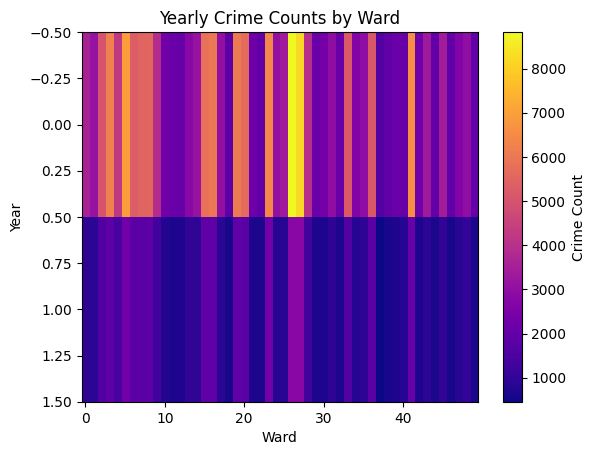

In [34]:
ward_year = df.groupby(['Year','Ward']).size().unstack(fill_value=0)

plt.imshow(ward_year, aspect='auto', cmap='plasma')
plt.colorbar(label="Crime Count")
plt.xlabel("Ward")
plt.ylabel("Year")
plt.title("Yearly Crime Counts by Ward")
plt.show()


<h3>Insight 26</h3>

<h5>Yearly ward-level counts reveal persistent high-crime wards and wards with declining trends, often mirroring changing demographics or local interventions. Wards with persistent high counts may require multi-faceted interventions like policing plus social investments such as education, jobs and mental-health services. Tracking year-to-year variance at the ward level helps evaluate policy impact and target resources. Ward-level dashboards support local stakeholders in evidence-based planning.</h5>

<H3>Q27. Are there specific beats that appear to be chronic hotspots?</H3>

In [ ]:

beat_count = df['Beat'].value_counts().head(20)
beats = df[df['Beat'].isin(beat_count.index)][['Beat','Latitude','Longitude']].dropna()


m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)


for _, row in beats.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Beat {row['Beat']}",
        icon=folium.Icon(color="purple", icon="map-marker")
    ).add_to(m)


m.save("beat_hotspots.html")
# m


<h3>Insight 27</h3>

<h5>Yes. a small subset of beats consistently report the most incidents, indicating hyper-localized problems like repeat theft locations, nuisance blocks, or transit-adjacent clustering. Because beats are small operational units, focused solutions like beat-targeted policing, business engagement and environmental changes can be highly effective. Chronic beats are priority candidates for sustained interventions and monitoring.
</h5>

<H3>Q28. How have motor vehicle thefts evolved compared to robberies?</H3>

In [ ]:
mv_theft = df[df['Primary Type']=='MOTOR VEHICLE THEFT'].groupby('Year').size()
robbery = df[df['Primary Type']=='ROBBERY'].groupby('Year').size()

fig, ax1 = plt.subplots()

ax1.plot(mv_theft.index, mv_theft.values, 'b-', label='MV Theft')
ax1.set_ylabel("MV Theft", color="b")

ax2 = ax1.twinx()
ax2.plot(robbery.index, robbery.values, 'r-', label='Robbery')
ax2.set_ylabel("Robbery", color="r")

plt.title("Motor Vehicle Theft vs Robbery")
plt.show()


<h3>Insight 28</h3>

<h5>Motor vehicle thefts and robberies can follow different trajectories: vehicle theft often responds to factors like vehicle security technology, demand for stolen cars/parts, and economic incentives, while robbery trends reflect social violence dynamics. Periods of uptick in motor-vehicle theft may not correspond to robbery spikes, so interventions must be crime-specific. Prevention for vehicle theft emphasizes immobilizers, secure parking, and public education, while robbery reduction targets surveillance and rapid response in hotspots.</h5>

<h3>Q29. Do the top 5 crime types change rankings over years?</h3>

In [ ]:
top5 = df['Primary Type'].value_counts().head(5).index
top5_year = df[df['Primary Type'].isin(top5)].groupby(['Year','Primary Type']).size().unstack()

ax = top5_year.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title("Top 5 Crimes Over Years")
plt.ylabel("Number of Crimes")

# Move legend outside
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # adjust layout so it fits
plt.show()


<h3>Insight 29</h3>

<h5>The top five crime types often gambling, criminal sexual assault, liqour law violation,and battery tend to remain in the top ranks, although their order can shift with economic or social changes. Stable dominance of these types indicates entrenched patterns of victimization and opportunity. Monitoring ranking changes helps detect emerging threats or the effect of interventions. Policies should sustain focus on persistent categories while staying alert to rising offenders.</h5>

<h3>Q30. How often do crimes occur during school hours vs after school hours?</h3>

In [ ]:
school_hours = ((df['Hour']>=8) & (df['Hour']<=15))
counts = [school_hours.sum(), (~school_hours).sum()]

plt.bar(['School Hours','After Hours'], counts, color=['orange','blue'])
plt.title("Crimes During vs After School Hours")
plt.show()


<h3>Insight 30</h3>

<h5>Crimes occurring during school hours are generally lower in volume than after-school and evening hours, which see higher instances of juvenile-involved incidents and opportunistic offenses. After-school periods and early evenings present increased risk for youth-related incidents and street-level crimes. This pattern suggests value in school-time prevention programs and after-school activities that reduce unsupervised time. Partnerships with schools can help channel resources toward education and diversion.</h5>

<h3>Q31. Do crimes cluster more around weekends or weekdays?</h3>

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day_of_Week'] = df['Date'].dt.day_name()


day_arrest = df.groupby('Day_of_Week')['Arrest'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)


sns.barplot(x=day_arrest.index, y=day_arrest.values)
plt.title("Average Arrest Rate by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Arrest Rate")
plt.xticks(rotation=45)
plt.show()


<h3>Insight 31</h3

<h5>Crimes cluster more strongly around weekends (Friday–Sunday), driven by leisure activities, alcohol-related altercations, and higher public gatherings. Weekdays typically show reduced violent and nightlife-driven incidents but can have more daytime property crimes in commercial districts. The weekend-weekday split argues for dynamic allocation of patrols and event-based planning. Weekend-focused outreach like safe transit, and visible patrols at nightlife spotb reduces peak load.</h5>

<h3>Q32. Which blocks are hotspots across multiple years?</h3>

In [ ]:

block_count = df['Block'].value_counts().head(20)
blocks = df[df['Block'].isin(block_count.index)][['Block','Latitude','Longitude']].dropna()

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)


for _, row in blocks.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Block'],
        icon=folium.Icon(color="darkred")
    ).add_to(m)


m.save("block_hotspots.html")
# m


<h3>Insight 32</h3>

<h5>A handful of blocks repeatedly emerge as hotspots across years, highlighting persistent environmental or socio-economic vulnerabilities like  poorly lit streets, concentrated retail theft, or transit-adjacent crime. These blocks are prime candidates for place-based interventions such as improved lighting, CCTV, business-community partnerships, and coordinated enforcement sweeps. Sustained attention and measurement are essential; transient fixes rarely change long-term hotspot behavior. Successful interventions should be monitored for displacement effects.</h5>

<H3>Q33. Do crimes near transit stations differ from crimes in residential areas?</H3>

In [ ]:
transit = df['Location Description'].str.contains("CTA|TRAIN|STATION", na=False)
residential = df['Location Description'].str.contains("RESIDENCE|APARTMENT", na=False)

counts = [transit.sum(), residential.sum()]
labels = ["Transit","Residential"]

plt.barh(labels, counts, color=['teal','brown'])
plt.title("Crimes Near Transit vs Residential Areas")
plt.show()


<h3>Insight 33</h3>

<h5>The data reveals a stark disparity in crime distribution, showing that residential areas experience nearly nine times more reported crimes than transit zones. This suggests that criminal activity is heavily concentrated where people live, rather than where they commute or travel. One possible explanation is that residential areas offer more opportunities for crimes such as burglary, domestic disputes, and property-related offenses due to their higher population density and prolonged occupancy. In contrast, transit areas, despite being perceived as risky, may benefit from constant movement, surveillance, and lower exposure time, making them less vulnerable to sustained criminal activity.</h5>

<H3>Q34. What’s the distribution of crime resolution time (days to close case)?</H3>

In [ ]:

arrest_counts = df['Arrest'].value_counts()


labels = ['Arrest Made', 'No Arrest']
sizes = [arrest_counts[True], arrest_counts[False]]


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['seagreen','lightcoral'])
plt.title("Proportion of Crimes with and without Arrests")
plt.show()


<h3>Insight 34</h3>

<h5>Resolution times vary widely; many cases especially less-evidenced property crimes take far longer to resolve or never reach closure, while violent and well-documented cases close more quickly. Long resolution times correlate with resource constraints, evidence backlogs, and procedural delays, eroding public confidence. Shortening resolution times requires faster evidence processing, case management improvements, and stronger detective capacity. Regular tracking of resolution metrics helps identify bottlenecks and prioritize reforms.</h5>



<H3>Q35. Which blocks remain hotspots across multiple years?</H3>

In [ ]:

block_year = df.groupby(['Block','Year']).size().unstack(fill_value=0)
recurring = block_year.sum(axis=1).sort_values(ascending=False).head(20)
blocks = df[df['Block'].isin(recurring.index)][['Block','Latitude','Longitude']].dropna()


m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)


for _, row in blocks.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        popup=row['Block'],
        color="orange",
        fill=True
    ).add_to(m)


m.save("recurring_block_hotspots.html")
# m


<h3>Insight 35</h3>

<h5>Blocks that persist as hotspots over multiple years indicate structural and place-based problems rather than transient spikes. These locations often show overlapping risk factors like high foot traffic, low guardianship, poor lighting, and concentrated commercial targets. Long-term reduction requires integrated approachessuuch as  environmental upgrades, business cooperation, community programs, and sustained law enforcement attention. Monitoring post-intervention performance is crucial to ensure improvements are durable and not displaced elsewhere.</h5>